In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
csv_file = "run_y24-m05-d07_h12-m32_HJuNd"
csv_file += ".csv"
path = os.path.join(os.getcwd(), "data", csv_file)

df = pd.read_csv(path)
df['change_gate'] = df["gate_x"].to_numpy() != df["gate_x"].shift(1).to_numpy()
df['vmag_local'] = pd.Series(np.linalg.norm([[df['vx_local'].iloc[i], df['vy_local'].iloc[i]] for i in range(len(df))], axis=1))
df['vmag_sp'] = pd.Series(np.linalg.norm([[df['vx_local_sp'].iloc[i], df['vy_local_sp'].iloc[i]] for i in range(len(df))], axis=1))
df.columns

Index(['index', 'run_name', 'x', 'y', 'z', 'roll', 'pitch', 'yaw', 'gate_x',
       'gate_y', 'gate_z', 'gate_yaw', 'vx_global', 'vy_global', 'vz_global',
       'vx_local', 'vy_local', 'roll_rate', 'pitch_rate', 'yaw_rate', 'x_sp',
       'y_sp', 'z_sp', 'vx_local_sp', 'vy_local_sp', 'alt_sp', 'yaw_rate_sp',
       'alt_command', 'roll_command', 'pitch_command', 'yaw_command',
       'camera_img', 'depth_img', 'pencil_img', 'change_gate', 'vmag_local',
       'vmag_sp'],
      dtype='object')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


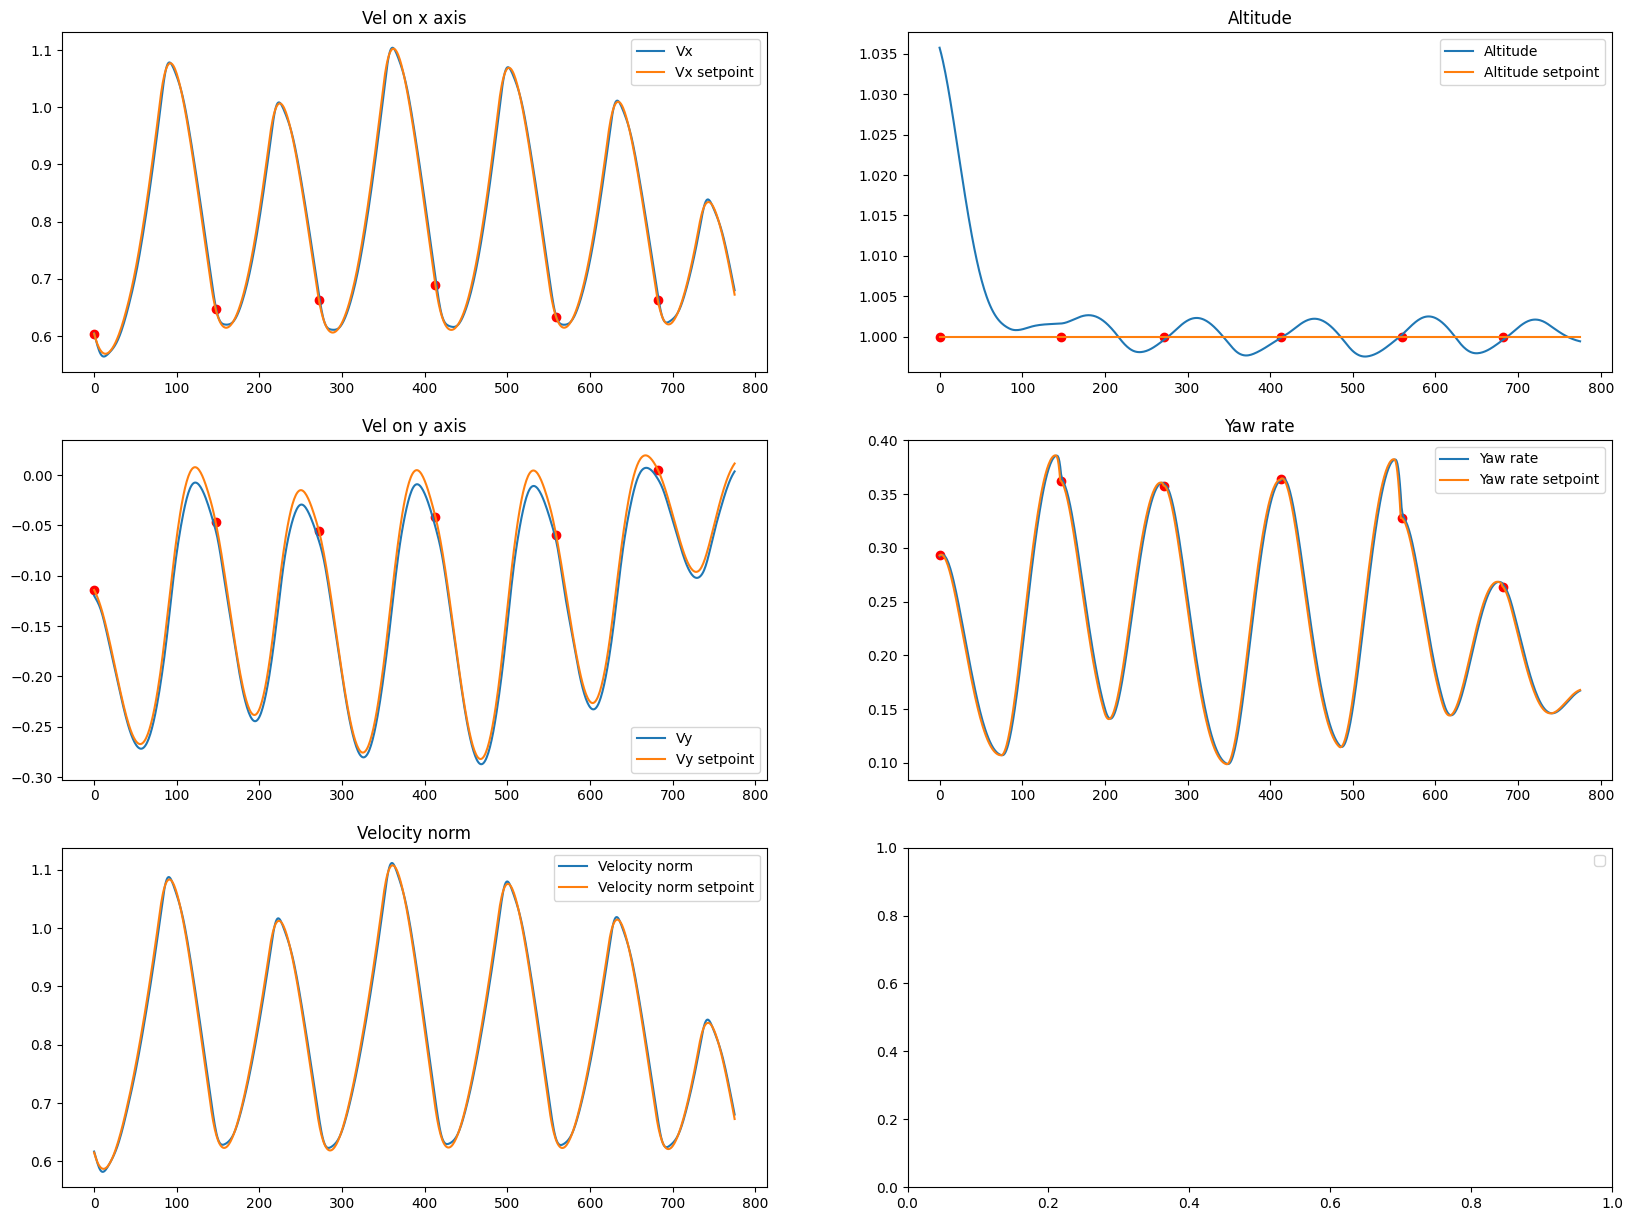

In [3]:
# %matplotlib notebook

plt.rcParams['figure.figsize'] = 20,15
fig, axs = plt.subplots(3, 2)


axs[0,0].plot(df['vx_local'], label='Vx')
axs[0,0].plot(df['vx_local_sp'], label='Vx setpoint')
axs[0,0].set_title("Vel on x axis")
axs[0,0].legend()

axs[1,0].plot(df['vy_local'], label='Vy')
axs[1,0].plot(df['vy_local_sp'], label='Vy setpoint')
axs[1,0].set_title("Vel on y axis")
axs[1,0].legend()


axs[0,1].plot(df['z'], label='Altitude')
axs[0,1].plot(df['alt_sp'], label='Altitude setpoint')
axs[0,1].set_title("Altitude")
axs[0,1].legend()

axs[1,1].plot(df["yaw_rate"], label='Yaw rate')
axs[1,1].plot(df["yaw_rate_sp"], label='Yaw rate setpoint')
axs[1,1].set_title("Yaw rate")
axs[1,1].legend()

axs[2,0].plot(df["vmag_local"], label='Velocity norm')
axs[2,0].plot(df["vmag_sp"], label='Velocity norm setpoint')
axs[2,0].set_title("Velocity norm")
axs[2,0].legend()


for i in range(len(df)):
    if df['change_gate'][i] == 1:
        axs[0,0].scatter(i, df['vx_local_sp'][i], color='red')
        axs[1,0].scatter(i, df['vy_local_sp'][i], color='red')
        axs[0,1].scatter(i, df['alt_sp'][i], color='red')
        axs[1,1].scatter(i, df['yaw_rate_sp'][i], color='red')


plt.legend()
plt.show()

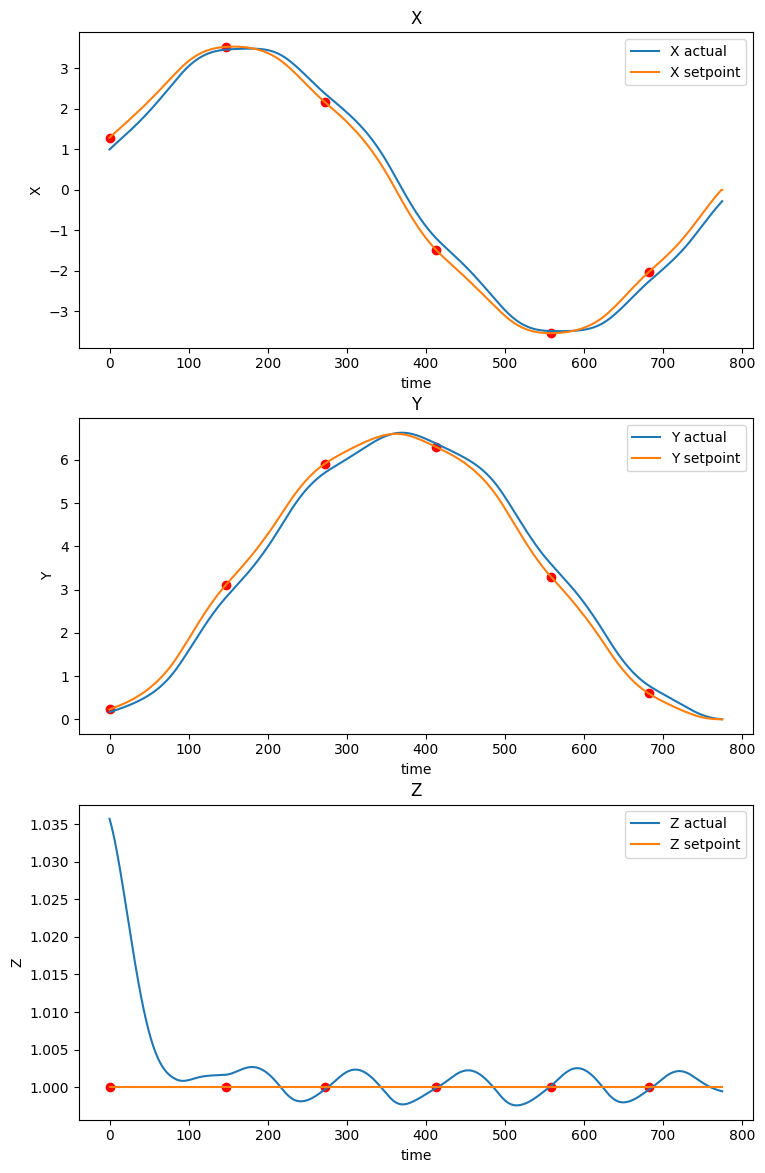

In [4]:
plt.rcParams['figure.figsize'] = 8,12
fig, axs = plt.subplots(3)
fig.tight_layout(pad=3.0)

axs[0].plot(df['x'], label="X actual")
axs[0].plot(df['x_sp'], label="X setpoint")
axs[0].set_title("X")
axs[0].set_xlabel("time")
axs[0].set_ylabel("X")
axs[0].legend()

axs[1].plot(df['y'], label="Y actual")
axs[1].plot(df['y_sp'], label="Y setpoint")
axs[1].set_title("Y")
axs[1].set_xlabel("time")
axs[1].set_ylabel("Y")
axs[1].legend()

axs[2].plot(df['z'], label="Z actual")
axs[2].plot(df['z_sp'], label="Z setpoint")
axs[2].set_title("Z")
axs[2].set_xlabel("time")
axs[2].set_ylabel("Z")
axs[2].legend()

for i in range(len(df)):
    if df['change_gate'][i] == 1:
        axs[0].scatter(i, df['x_sp'][i], color='red')
        axs[1].scatter(i, df['y_sp'][i], color='red')
        axs[2].scatter(i, df['z_sp'][i], color='red')



plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


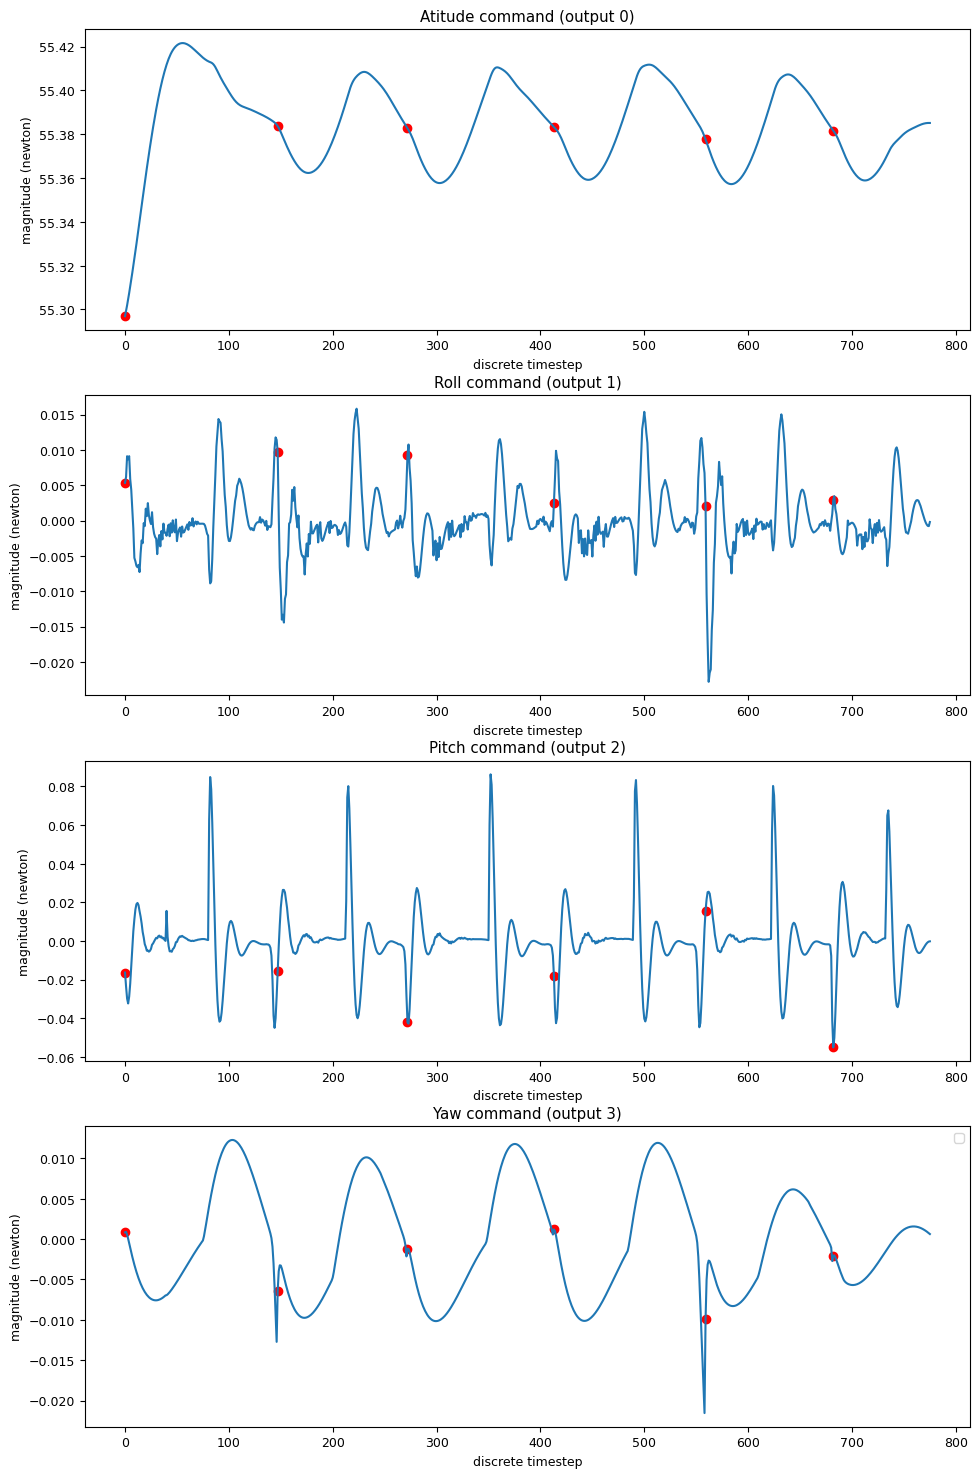

In [5]:
plt.rcParams['figure.figsize'] = 10,15
plt.rcParams['font.size'] = 9
fig, axs = plt.subplots(4)
fig.tight_layout(pad=3.0)
min_scope, max_scope = 0, 10000


axs[0].plot(df['alt_command'][min_scope:max_scope])
axs[0].set_title("Atitude command (output 0)")
axs[0].set_xlabel('discrete timestep')
axs[0].set_ylabel('magnitude (newton)')
# axs[0].set_ylim(54,56)

axs[1].plot(df['roll_command'][min_scope:max_scope])
axs[1].set_title("Roll command (output 1)")
axs[1].set_xlabel('discrete timestep')
axs[1].set_ylabel('magnitude (newton)')

axs[2].plot(df['pitch_command'][min_scope:max_scope])
# axs[2].plot([x for x in df['pitch_command'][min_scope:max_scope].index ],[0 for x in df['pitch_command'][min_scope:max_scope]])
axs[2].set_title("Pitch command (output 2)")
axs[2].set_xlabel('discrete timestep')
axs[2].set_ylabel('magnitude (newton)')

axs[3].plot(df['yaw_command'][min_scope:max_scope])
axs[3].set_title("Yaw command (output 3)")
axs[3].set_xlabel('discrete timestep')
axs[3].set_ylabel('magnitude (newton)')

for i in range(len(df)):
    if df['change_gate'][i] == 1:
        axs[0].scatter(i, df['alt_command'][i], color='red')
        axs[1].scatter(i, df['roll_command'][i], color='red')
        axs[2].scatter(i, df['pitch_command'][i], color='red')
        axs[3].scatter(i, df['yaw_command'][i], color='red')




plt.legend()
plt.show()